In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:\Users\lenovo\Documents\datasets\int_files\train.csv')
test = pd.read_csv(r'C:\Users\lenovo\Documents\datasets\int_files\test.csv')
sample_submission = pd.read_csv(r'C:\Users\lenovo\Documents\datasets\int_files\sample_submission.csv')


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.shape

(1460, 81)

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# calculate missing values
print("*****************************")
print(f"Missing values in each column:\n{train.isnull().sum().sort_values(ascending=False)}")

*****************************
Missing values in each column:
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


In [7]:
print("*****************************")
print(f"Percentage of missing values in each column:\n{round(train.isnull().sum() / len(train) * 100, 2).sort_values(ascending=False)}")

*****************************
Percentage of missing values in each column:
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
MasVnrType     59.73
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64


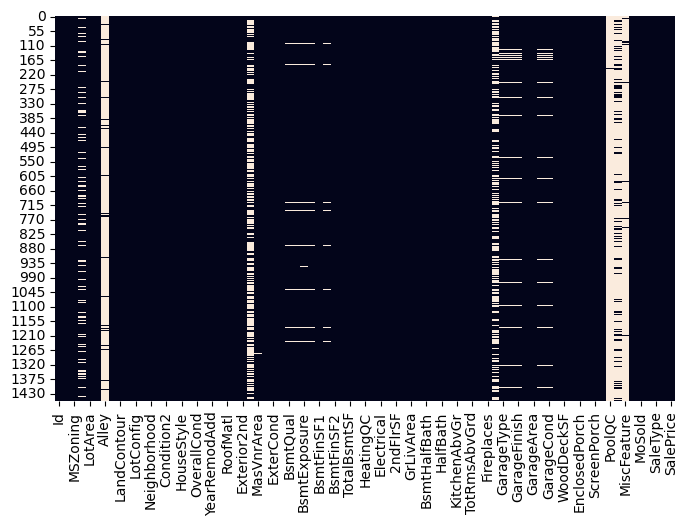

In [8]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(train.isnull(), cbar=False)
plt.show()

In [9]:
#Handling missing values
for columns in range(train.shape[1]):
    if train.iloc[:,columns].isnull().sum() > 0:
        if train.iloc[:,columns].dtype == 'object':
            train.iloc[:,columns] = train.iloc[:,columns].fillna(train.iloc[:,columns].mode()[0])
        else:
            train.iloc[:,columns] = train.iloc[:,columns].fillna(train.iloc[:,columns].mean())

In [10]:
train.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [11]:
num_data = train.select_dtypes(exclude='object').columns
num_data

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
num_data = train.select_dtypes(exclude='object')
num_data.corrwith(num_data['SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.470177
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

In [13]:
cat_data = train.select_dtypes(exclude='number').columns
cat_data

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
# print unique values
cat_data = train.select_dtypes(exclude='number').columns
for cat_column in cat_data:
      print(f'Unique values in {cat_column}: {train[cat_column].unique()}\n')

Unique values in MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values in Street: ['Pave' 'Grvl']

Unique values in Alley: ['Grvl' 'Pave']

Unique values in LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

Unique values in LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Unique values in Utilities: ['AllPub' 'NoSeWa']

Unique values in LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique values in LandSlope: ['Gtl' 'Mod' 'Sev']

Unique values in Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique values in Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Unique values in Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Unique values in BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Unique values in HouseStyle: ['2Story'

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for cat_column in cat_data:
      train[cat_column] = le.fit_transform(train[cat_column])

for cat_column in cat_data:
      print(f'Unique values in {cat_column}: {train[cat_column].unique()}\n')

Unique values in MSZoning: [3 4 0 1 2]

Unique values in Street: [1 0]

Unique values in Alley: [0 1]

Unique values in LotShape: [3 0 1 2]

Unique values in LandContour: [3 0 2 1]

Unique values in Utilities: [0 1]

Unique values in LotConfig: [4 2 0 1 3]

Unique values in LandSlope: [0 1 2]

Unique values in Neighborhood: [ 5 24  6 15 11 21 14 17  3 19 16 12 20  9 10  7 23  8 22  4 13  0  2 18
  1]

Unique values in Condition1: [2 1 4 0 5 8 6 3 7]

Unique values in Condition2: [2 0 7 1 4 3 6 5]

Unique values in BldgType: [0 1 2 4 3]

Unique values in HouseStyle: [5 2 0 1 6 7 4 3]

Unique values in RoofStyle: [1 3 2 4 0 5]

Unique values in RoofMatl: [1 7 3 6 2 5 4 0]

Unique values in Exterior1st: [12  8 13  6  3 14  5  9  0 11  2  1 10  7  4]

Unique values in Exterior2nd: [13  8 15  6 10 14  5  3 12  0  2  7  1 11  9  4]

Unique values in MasVnrType: [1 2 0]

Unique values in ExterQual: [2 3 0 1]

Unique values in ExterCond: [4 2 1 3 0]

Unique values in Foundation: [2 1 0 5 3 4]


In [16]:
x = train.drop(columns = ['SalePrice'],axis=1)
y = train['SalePrice']
print(f'Shape of Features:{x.shape}')
print(f'Shape of Target:{y.shape}')

Shape of Features:(1460, 80)
Shape of Target:(1460,)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print(f'Shape of x_train:{x_train.shape}')
print(f'Shape of Y_train:{Y_train.shape}')
print(f'Shape of x_test:{x_test.shape}')
print(f'Shape of Y_test:{Y_test.shape}')

Shape of x_train:(1168, 80)
Shape of Y_train:(1168,)
Shape of x_test:(292, 80)
Shape of Y_test:(292,)


In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, Y_train)

RandomForestRegressor()

In [19]:
test = pd.read_csv(r'C:\Users\lenovo\Documents\datasets\int_files\test.csv')
test.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [20]:
for columns in range(test.shape[1]):
    if test.iloc[:,columns].isnull().sum() > 0:
        if test.iloc[:,columns].dtype == 'object':
            test.iloc[:,columns] = test.iloc[:,columns].fillna(test.iloc[:,columns].mode()[0])
        else:
            test.iloc[:,columns] = test.iloc[:,columns].fillna(test.iloc[:,columns].mean())

test.isnull().sum().sort_values(ascending=False)
            

Id               0
MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
# encode the categorical variables using for loop where object and categoy datatypes are given
for col in test.columns:
    if test[col].dtype == 'object' or test[col].dtype.name == 'category':
       test[col] = LabelEncoder().fit_transform(test[col])
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,0,3,3,0,...,120,0,0,2,2,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,0,3,0,...,0,0,0,2,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,0,3,0,...,0,0,0,2,2,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,0,3,0,...,0,0,0,2,2,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,0,1,0,...,144,0,0,2,2,0,1,2010,8,4


In [22]:
cat_test = test.select_dtypes(exclude='number').columns
cat_test

Index([], dtype='object')

In [23]:
# print unique values
cat_test = test.select_dtypes(exclude='number').columns
for cat_column in cat_test:
      print(f'Unique values in {cat_column}: {test[cat_column].unique()}\n')

In [24]:
test_prediction = model.predict(test)

output = pd.DataFrame({'Id': test.Id, 'SalePrice': test_prediction})
output

,Id,SalePrice
0,1461,124227.00
1,1462,152748.50
2,1463,180086.35
3,1464,187127.32
4,1465,200991.47
...,...,...
1454,2915,88059.50
1455,2916,88388.50
1456,2917,153497.37
1457,2918,119549.00


In [25]:
output.to_csv('Submission.csv', index=False)